## Project Milestone P2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
movie_metadata = pd.read_csv('movie.metadata.tsv',sep='\t', header=None)

In [3]:
movie_metadata.columns = ['Wikipedia_movie_ID','Freebase_movie_ID','name','release_date',
    'box_office_revenue', 'runtime','languages','countries','genres']
movie_metadata.head()

,Wikipedia_movie_ID,Freebase_movie_ID,name,release_date,box_office_revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [4]:
years = movie_metadata.release_date.values
print(years)

['2001-08-24' '2000-02-16' '1988' ... '1972-09-22' '1992-05-21' '2002']


In [5]:
#filter the years:
filtered_years =[]
for year in years:
    if isinstance(year, str):
        if len(year) > 4:
            filtered_years.append(year[0:4])
        else:
            filtered_years.append(year)
print(filtered_years)

['2001', '2000', '1988', '1987', '1983', '1913', '2002', '1938', '1974', '1960', '1930', '1974', '1997', '1989', '1986', '1984', '1964', '1967', '1992', '1930', '1999', '2009', '1962', '1931', '1935', '1959', '2007', '1979', '2001', '1984', '1989', '1958', '1984', '1943', '1986', '1940', '2010', '1999', '2010', '1955', '1990', '2011', '1982', '1930', '2006', '1997', '2001', '1914', '1980', '2008', '1917', '1918', '2008', '1989', '1977', '2006', '1997', '1996', '1961', '2006', '1989', '1911', '1962', '1993', '1939', '1986', '1945', '1959', '2007', '1994', '1984', '2008', '2003', '1976', '1949', '1975', '1958', '1976', '2007', '1991', '2001', '1995', '1923', '1954', '2003', '1957', '2001', '1921', '2007', '1951', '1968', '1920', '1969', '2005', '1951', '2007', '1968', '1975', '1996', '2003', '2008', '1915', '2005', '2011', '1973', '2010', '2005', '1972', '1986', '1956', '1996', '2011', '1947', '1963', '2004', '2005', '2005', '1979', '2006', '2009', '1914', '1968', '2010', '1929', '1979',

In [6]:
filtered_years = pd.Series(filtered_years)
counted_years = filtered_years.value_counts().sort_index()
counted_years

1010       1
1888       1
1889       1
1890       2
1891       3
        ... 
2012    1194
2013     164
2014      17
2015       4
2016       3
Name: count, Length: 130, dtype: int64

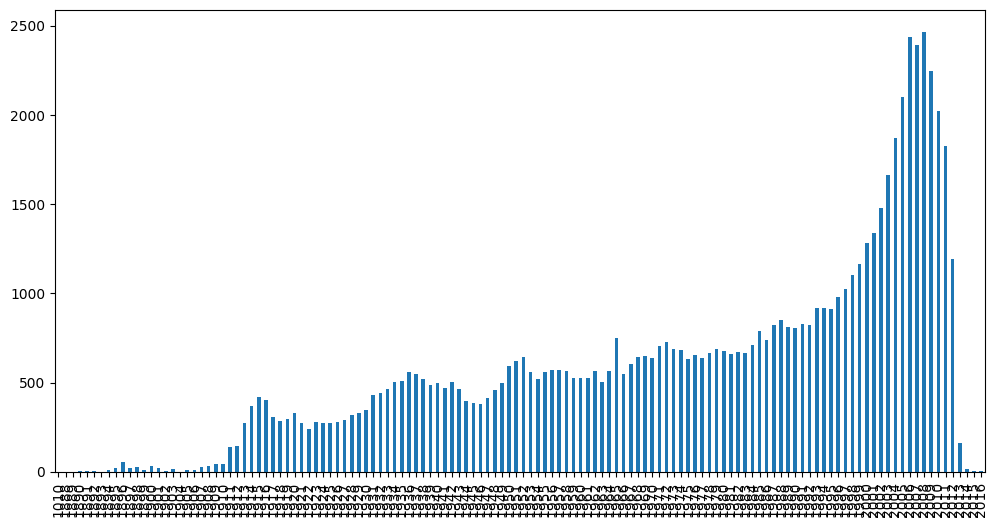

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust 12 for a wider plot

# Plot the data on the created axis
counted_years.plot.bar(ax=ax)

plt.show()

In [8]:
# Ensure the index is numeric
counted_years.index = counted_years.index.astype(int)

# Define bins and labels for the years
year_bins = [1000, 1200,1800,1900, 1910,1920,1930,1940, 1950,1960,1970,1980,1990, 2000, 2010, 2020]  # Adjust these bins as needed
year_labels = ['1000-1200', '1200-1800','1800-1900','1900-1910','1910-1920','1920-1930','1930-1940','1940-1950','1960-1960','1960-1970','1970-1980','1980-1990','1990-2000', '2000-2010','2010-2020']

# Bin the index (years) and group the counts based on these bins
binned_index = pd.cut(counted_years.index, bins=year_bins, labels=year_labels)
binned_counts = counted_years.groupby(binned_index).sum()

# Display the binned counts
print(binned_counts)


1000-1200        1
1200-1800        0
1800-1900      184
1900-1910      204
1910-1920     2952
1920-1930     2904
1930-1940     4950
1940-1950     4561
1960-1960     5657
1960-1970     5986
1970-1980     6757
1980-1990     7526
1990-2000     9941
2000-2010    20010
2010-2020     3206
Name: count, dtype: int64


/var/folders/v0/fsjhyw8s4q981gycqjlwxknm0000gn/T/ipykernel_82185/3632250800.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_counts = counted_years.groupby(binned_index).sum()


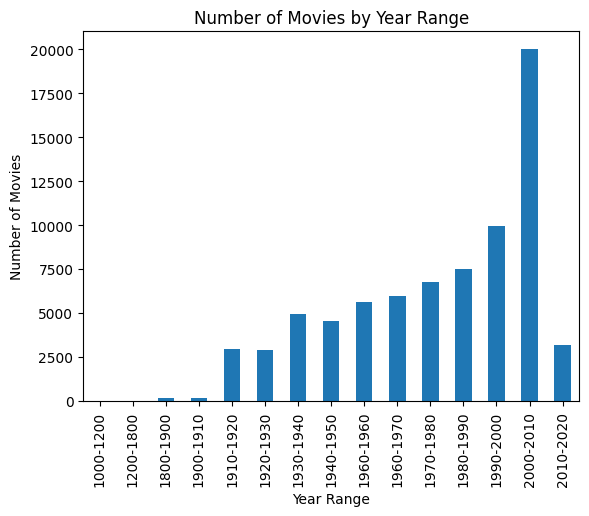

In [9]:
binned_counts.plot(kind='bar')

# Customize the plot
plt.xlabel('Year Range')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Year Range')
plt.show()


Analyse the countries

In [10]:
countries = movie_metadata.countries.values
countries

array(['{"/m/09c7w0": "United States of America"}',
       '{"/m/09c7w0": "United States of America"}',
       '{"/m/05b4w": "Norway"}', ...,
       '{"/m/09c7w0": "United States of America"}',
       '{"/m/03_3d": "Japan"}', '{"/m/0d060g": "Canada"}'], dtype=object)

In [11]:
import ast
countries_cleaned = []
for country in countries:
    if len(country) > 2:
        data_dict = ast.literal_eval(country)  # Convert the string to a dictionary
        country_name = list(data_dict.values())[0]  
        countries_cleaned.append(country_name)
countries_cleaned

['United States of America',
 'United States of America',
 'Norway',
 'United Kingdom',
 'Germany',
 'United States of America',
 'South Africa',
 'United States of America',
 'Argentina',
 'United Kingdom',
 'United States of America',
 'Japan',
 'United States of America',
 'United Kingdom',
 'Turkey',
 'United States of America',
 'United States of America',
 'German Democratic Republic',
 'United States of America',
 'United States of America',
 'United States of America',
 'United States of America',
 'Germany',
 'Soviet Union',
 'United States of America',
 'France',
 'India',
 'New Zealand',
 'United States of America',
 'India',
 'India',
 'German Democratic Republic',
 'United States of America',
 'Mexico',
 'India',
 'United States of America',
 'India',
 'Australia',
 'India',
 'Argentina',
 'United States of America',
 'Hong Kong',
 'United States of America',
 'United States of America',
 'United States of America',
 'United States of America',
 'United States of America',

In [12]:
countries_cleaned = pd.Series(countries_cleaned)
counted_countries = countries_cleaned.value_counts().sort_index()
counted_countries

Afghanistan           8
Albania              20
Algeria              17
Argentina          1291
Armenia               8
                   ... 
Weimar Republic      67
West Germany        342
Yugoslavia          246
Zambia                1
Zimbabwe              4
Name: count, Length: 135, dtype: int64

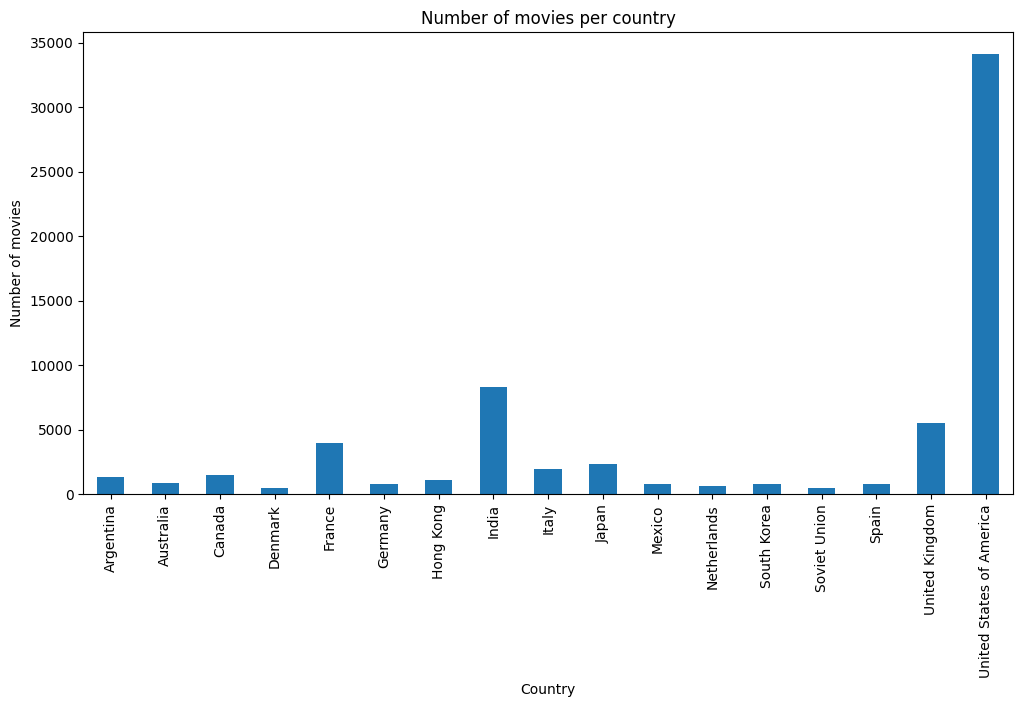

In [13]:
kept_counted = counted_countries[counted_countries.values>500]
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust 12 for a wider plot

# Plot the data on the created axis
kept_counted.plot.bar(ax=ax)

plt.title("Number of movies per country")
plt.ylabel("Number of movies")
plt.xlabel("Country")

plt.show()

## Feminism analysis

In [14]:
# trouver les films feministes
feminism_metadata = pd.read_csv('movies_feminism.csv')

In [15]:
feminism_metadata.head()

,Unnamed: 0,title,year,bt_score,dubious,imdbid,tmdbId,genres,popularity,production_companies,...,revenue,vote_average,vote_count,cast,crew,budget,cast_gender,crew_gender,cast_female_representation,crew_female_representation
0,0,Cinderella,1899,3,0,230,114108,"['Drama', 'Family', 'Fantasy', 'Romance']",3.762,"['Star-Film', 'Georges Méliès']",...,0.0,6.1,79.0,"[{'adult': False, 'gender': 2, 'id': 11523, 'k...","[{'adult': False, 'gender': 2, 'id': 11523, 'k...",0.0,"[2, 0, 1, 0, 1, 0]","[2, 2, 2, 2]",33.333333,0.000000
1,1,Gretchen the Greenhorn,1916,3,0,6745,126925,[],1.942,[],...,0.0,6.1,7.0,"[{'adult': False, 'gender': 1, 'id': 30779, 'k...","[{'adult': False, 'gender': 2, 'id': 42060, 'k...",0.0,"[1, 2, 2, 2]","[2, 2, 2]",25.000000,0.000000
2,2,Snow White,1916,3,0,7361,174598,"['Fantasy', 'Drama']",0.817,[],...,0.0,5.7,9.0,"[{'adult': False, 'gender': 0, 'id': 1658947, ...","[{'adult': False, 'gender': 2, 'id': 28968, 'k...",0.0,"[0, 1, 2, 2, 0]",[2],20.000000,0.000000
3,3,The Poor Little Rich Girl,1917,3,0,8443,95866,"['Romance', 'Comedy', 'Drama', 'Fantasy']",2.023,['Artcraft Pictures Corporation'],...,0.0,5.8,23.0,"[{'adult': False, 'gender': 1, 'id': 100047, '...","[{'adult': False, 'gender': 2, 'id': 13335, 'k...",0.0,"[1, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0, 1, 1]","[2, 2, 1, 1, 2, 2, 0]",38.461538,28.571429
4,4,Stella Maris,1918,3,0,9652,70753,['Drama'],1.310,['Mary Pickford Company'],...,2400000.0,6.9,19.0,"[{'adult': False, 'gender': 1, 'id': 100047, '...","[{'adult': False, 'gender': 1, 'id': 34741, 'k...",0.0,"[1, 1, 2, 2, 1, 0, 0, 2]","[1, 2, 2, 0, 2, 2]",37.500000,16.666667


In [16]:
feminism_essential = feminism_metadata[['title','bt_score']]
feminism_essential.head()

,title,bt_score
0,Cinderella,3
1,Gretchen the Greenhorn,3
2,Snow White,3
3,The Poor Little Rich Girl,3
4,Stella Maris,3


In [17]:
feminism_essential2 = feminism_essential[feminism_essential['bt_score'] == 3]
feminism_essential2.rename(columns = {'title':'name'}, inplace = True)
feminism_essential2.head()

/var/folders/v0/fsjhyw8s4q981gycqjlwxknm0000gn/T/ipykernel_82185/1594987654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feminism_essential2.rename(columns = {'title':'name'}, inplace = True)


,name,bt_score
0,Cinderella,3
1,Gretchen the Greenhorn,3
2,Snow White,3
3,The Poor Little Rich Girl,3
4,Stella Maris,3


In [18]:
non_feminism = feminism_essential[feminism_essential['bt_score'] == 0]
non_feminism.rename(columns = {'title':'name'}, inplace = True)
non_feminism.head()

/var/folders/v0/fsjhyw8s4q981gycqjlwxknm0000gn/T/ipykernel_82185/3646922167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_feminism.rename(columns = {'title':'name'}, inplace = True)


,name,bt_score
6496,Sallie Gardner at a Gallop,0
6497,Accordion Player,0
6498,"Monkeyshines, No. 1",0
6499,"Monkeyshines, No. 2",0
6500,"Monkeyshines, No. 3",0


In [19]:
movie_metadata.head()

,Wikipedia_movie_ID,Freebase_movie_ID,name,release_date,box_office_revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [20]:
movie_plots = pd.read_csv("plot_summaries.txt", sep='\t', header=None, names=["Wikipedia_movie_ID", "plot"])
movie_plots = movie_plots.dropna(subset=['plot'])
movie_plots.head()

,Wikipedia_movie_ID,plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [21]:
movie_ID_names = movie_metadata[['Wikipedia_movie_ID','name']]
movie_ID_names.head()

,Wikipedia_movie_ID,name
0,975900,Ghosts of Mars
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...
2,28463795,Brun bitter
3,9363483,White Of The Eye
4,261236,A Woman in Flames


In [22]:
merged_plots_names = pd.merge(movie_ID_names, movie_plots, on='Wikipedia_movie_ID', how='inner')
merged_plots_names

,Wikipedia_movie_ID,name,plot
0,975900,Ghosts of Mars,"Set in the second half of the 22nd century, th..."
1,9363483,White Of The Eye,A series of murders of rich young women throug...
2,261236,A Woman in Flames,"Eva, an upper class housewife, becomes frustra..."
3,18998739,The Sorcerer's Apprentice,"Every hundred years, the evil Morgana returns..."
4,6631279,Little city,"Adam, a San Francisco-based artist who works a..."
...,...,...,...
42199,23851782,The Ghost Train,{{plot}} The film opens with a Great Western e...
42200,35228177,Mermaids: The Body Found,Two former National Oceanic Atmospheric Admini...
42201,34980460,Knuckle,{{No plot}} This film follows 12 years in the ...
42202,913762,The Super Dimension Fortress Macross II: Lover...,"The story takes place in the year 2092,The Sup..."


In [23]:
merged_feminsim_plot = pd.merge(feminism_essential2, merged_plots_names, on='name', how='inner')
merged_feminsim_plot = merged_feminsim_plot.drop(['Wikipedia_movie_ID'],axis=1)
merged_feminsim_plot.head()

,name,bt_score,plot
0,Cinderella,3,Cinderella is the much-loved only child of a w...
1,Cinderella,3,Cinderella is a winsome young girl who lives w...
2,Cinderella,3,"In the village square, a Herald proclaims: ""T..."
3,Cinderella,3,The film starts off with a birthday cake being...
4,Cinderella,3,"An adaptation of the fairy tale, Cinderella tr..."


In [24]:
merged_non_feminism_plot = pd.merge(non_feminism, merged_plots_names, on="name", how='inner')
merged_non_feminism_plot = merged_non_feminism_plot.drop(['Wikipedia_movie_ID'],axis=1)
merged_non_feminism_plot.head()

,name,bt_score,plot
0,Blacksmith Scene,0,The scene is all filmed from a stationary came...
1,The Haunted Castle,0,A company of men meets for a hunt lasting seve...
2,A Terrible Night,0,"A man tries to go to sleep, but is disturbed b..."
3,The Astronomer's Dream,0,"In the observatory, the astronomer is studying..."
4,The Man with the Rubber Head,0,A chemist in his laboratory places upon a tabl...


In [25]:
all_plots = pd.concat([merged_feminsim_plot,merged_non_feminism_plot])
all_plots.head()

,name,bt_score,plot
0,Cinderella,3,Cinderella is the much-loved only child of a w...
1,Cinderella,3,Cinderella is a winsome young girl who lives w...
2,Cinderella,3,"In the village square, a Herald proclaims: ""T..."
3,Cinderella,3,The film starts off with a birthday cake being...
4,Cinderella,3,"An adaptation of the fairy tale, Cinderella tr..."


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

X = all_plots['plot']
y = all_plots['bt_score']
# Convert X to DataFrame to use with RandomUnderSampler
X = X.values.reshape(-1, 1)

# Use RandomUnderSampler to balance the dataset
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

# Convert X back to Series
X_res = pd.Series(X_res.flatten())

# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),  # Adjust max_features as needed
    ('model', LogisticRegression(solver='liblinear', random_state=42))  # You can change the model here
])

# Train the model
pipeline.fit(X_train, y_train)


# Make predictions
y_pred = pipeline.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7086614173228346

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.71      0.72       137
           3       0.67      0.71      0.69       117

    accuracy                           0.71       254
   macro avg       0.71      0.71      0.71       254
weighted avg       0.71      0.71      0.71       254



In [27]:
# Extract the trained model and vectorizer
tfidf = pipeline.named_steps['tfidf']
model = pipeline.named_steps['model']

# Get feature names and coefficients
feature_names = tfidf.get_feature_names_out()
coefficients = model.coef_.flatten()

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Display the top 10 features
print("Top 20 Features with Positive Influence:")
print(feature_importance.head(20))

print("\nTop 20 Features with Negative Influence:")
print(feature_importance.tail(20))

Top 20 Features with Positive Influence:
       Feature  Coefficient
2968    mother     1.810257
3947    school     1.403096
4133    sister     1.286655
2696      love     1.227711
1649    family     1.053197
155      alice     1.030603
1121  daughter     1.010335
2710      lucy     0.899319
2801      mary     0.897330
4931     women     0.894728
2150     house     0.888381
3547     queen     0.872795
2174   husband     0.868736
209      annie     0.858809
781   children     0.844492
2787  marriage     0.778444
1894     girls     0.749941
2126      home     0.738122
3565    rachel     0.733107
3226   parents     0.732355

Top 20 Features with Negative Influence:
          Feature  Coefficient
2326         jack    -0.568910
549          boys    -0.569498
262        arthur    -0.570290
2109       hitman    -0.585387
1047         crew    -0.589181
4607        tramp    -0.617410
2198  illusionist    -0.622951
2385        joker    -0.629301
2467       killed    -0.633486
2338     japanese  

In [28]:
## predict on all movies
new_predictions = pipeline.predict(movie_plots['plot'])

bool_new_predictions = []
for prediction in new_predictions:
    if prediction == 3: 
        bool_new_predictions.append(True)
    else:
        bool_new_predictions.append(False)

bool_new_predictions = pd.Series(bool_new_predictions)
movie_plots['prediction'] = bool_new_predictions


In [29]:
movie_plots.head()

,Wikipedia_movie_ID,plot,prediction
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",True
1,31186339,The nation of Panem consists of a wealthy Capi...,False
2,20663735,Poovalli Induchoodan is sentenced for six yea...,True
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",True
4,595909,Seventh-day Adventist Church pastor Michael Ch...,True


In [30]:
movie_plots_years = movie_plots.copy()
movie_plots_years['year'] = filtered_years

In [31]:
movie_plots_years.head()

,Wikipedia_movie_ID,plot,prediction,year
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",True,2001
1,31186339,The nation of Panem consists of a wealthy Capi...,False,2000
2,20663735,Poovalli Induchoodan is sentenced for six yea...,True,1988
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",True,1987
4,595909,Seventh-day Adventist Church pastor Michael Ch...,True,1983


In [32]:
feminist_count = movie_plots_years[movie_plots_years['prediction'] == 1]

# Group by the 'year' column and count the number of true predictions
count_per_year = feminist_count.groupby('year').size().reset_index(name='count')

# Display the result
print(count_per_year)

     year  count
0    1891      1
1    1893      1
2    1894      4
3    1895      4
4    1896     15
..    ...    ...
119  2012    424
120  2013     58
121  2014      5
122  2015      1
123  2016      1

[124 rows x 2 columns]


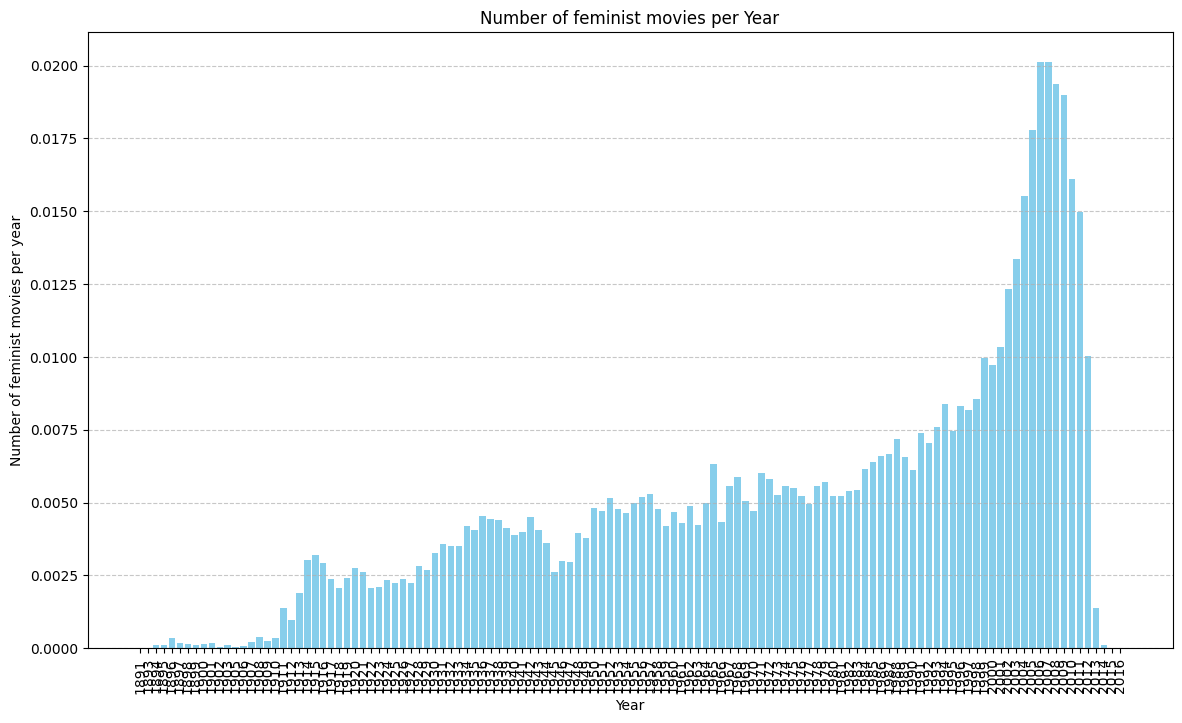

In [35]:
# Plot the number of true predictions per year as a bar plot
plt.figure(figsize=(14, 8))
plt.bar(count_per_year['year'], count_per_year['count']/len(movie_plots_years), color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of feminist movies per year')
plt.title('Number of feminist movies per Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.show()